# Ridge (L2) Regression
<br><br>
In order to avoid overfitting we introduce 'Regularization' into our model in order to reduce the weights in our vector $w$. This is accomplished by using MAP estimation with a Gaussian/Normal prior. I.e.<br><br>
$$P(w) = N(w_j|0, \tau^2)$$ 
<br><br>
Therefore, for Ridge Regression we have the following optimization/objective. Note that now we have a likelihood **and** a prior.
<br><br>
$$\theta_{Ridge} = \quad \underset{w}{\mathrm{argmax}}\quad log(P(Y|x,w)P(w))\\
= \underset{\theta}{\mathrm{argmin}}\quad - \sum_{i=1}^{N} log[\frac{1}{\sqrt{2\pi\sigma^2}}exp(\frac{-(y_i - w^Tx_i)^2}{2\sigma^2})] - \sum_{j=1}^{D}log[\frac{1}{\sqrt{2\pi\tau^2}}exp(\frac{-(w_j)^2}{2\tau^2})]\\
= \underset{\theta}{\mathrm{argmin}}\quad - \sum_{i=1}^{N} log[\frac{1}{\sqrt{2\pi\sigma^2}}] + log [exp(\frac{-(y_i - w^Tx_i)^2}{2\sigma^2})] - \sum_{j=1}^{D} log[\frac{1}{\sqrt{2\pi\tau^2}}] + log [exp(\frac{-(w_j)^2}{2\tau^2})]\\
= \underset{\theta}{\mathrm{argmin}}\quad \sum_{i=1}^{N} [\frac{log(2\pi\sigma^2)}{2} + \frac{(y_i - w^Tx_i)^2}{2\sigma^2})] + \sum_{j=1}^{D} [\frac{log(2\pi\tau^2)}{2} + \frac{(w_j)^2}{2\tau^2}]
$$
<br><br> 
If you then:
<br>
* multiply by $2\sigma^2$ 
* carry on with the algebra (see the linear regression notebook for more details)
* drop constants since they do NOT affect the minimization 
* minimize the objective, i.e. take the partial derivative w.r.t. w and set = 0
<br>
you will arrive at the following:
<br><br>
$$\theta_{Ridge} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + w^Tx_i))^2 + \lambda||w||_{2}^{2}\\
= \frac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + w^Tx_i))^2 + Complexity\space Penalty\\
$$
<br>
where $\lambda = \frac{\sigma^2}{\tau^2}, \lambda\geq0$ and $||w||_{2}^{2} = \sum_{j=1}^{D}w_j^2 = w^Tw$.
<br><br>
And by the same method used to compute the normal equation in the linear regression notebook, we find the solution:
<br><br>
$$w_{Ridge} = (\lambda I_D + X^TX)^{-1}X^Ty $$
<br><br>
Leaving aside the details, below is sample code for computing $w_{Ridge}$ using the normal equation. Assume that 'x_train' has your training samples and 'y_train' has the corresponding labels. 
<br>
    > l = .5 # lambda value<br>
    > dim = 3 # used to create I vector<br>
    > reg = np.matrix(np.eye(dim,dim)*l)<br>
    > xTx = x_train.T.dot(x_train)+reg<br>
    > XtX = np.linalg.inv(xTx)<br>
    > w_ridge = XtX.dot(pd.DataFrame((x_train.T).dot(y_train)))

Ultimately what the 'Complexity Penalty' (via the MAP estimation) did was to increase the value of the $w_{Ridge}$ expression as can be appreciated by the second term. As a result, the minimization step will reduce the weight of each w thereby reduce overfitting. In the example below see how the l2 regularizer 'flattens' the linear regression curve and the higher the alpha parameter (the $\lambda$ in the expressions above) the flatter the curve. Note that the Complexity Penalty applies to all of the weights except for $w_0$ since that is the bias term. The bias term only shifts your curve/estimate up or down and has nothing to do with overfitting. 
<br><br>
# Ridge Regression with scikit-learn

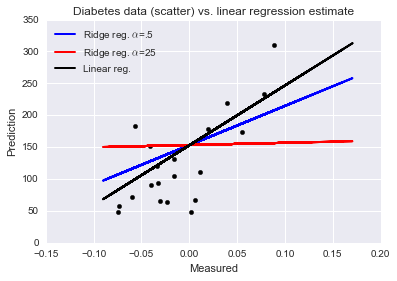

In [9]:
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Train the model using the training set
model = linear_model.Ridge(alpha=.5)
model.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the training set.
diabetes_pred_ridge = model.predict(diabetes_X_train)
# Repeat the training with a higher alpha for illustration purposes
model = linear_model.Ridge(alpha=25)
model.fit(diabetes_X_train, diabetes_y_train)
diabetes_pred_ridge2 = model.predict(diabetes_X_train)

# Do the linear regression for comparison only
lr = linear_model.LinearRegression()
lr.fit(diabetes_X_train, diabetes_y_train)
diabetes_pred_lr = lr.predict(diabetes_X_train)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_train, diabetes_pred_ridge, color='blue', linewidth=2, label=r"Ridge reg. $\alpha$=.5")
plt.plot(diabetes_X_train, diabetes_pred_ridge2, color='red', linewidth=2, label=r"Ridge reg. $\alpha$=25")
plt.plot(diabetes_X_train, diabetes_pred_lr, color='black', linewidth=2, label="Linear reg.")
plt.xlabel("Measured")
plt.ylabel("Prediction")
plt.title("Diabetes data (scatter) vs. linear regression estimate")
plt.legend(loc="best")
plt.show()

<br><br>
# Key Take Away
<br>
Penalize complexity via the second term in the NLL(w).